In [0]:
from google.colab import files
uploaded = files.upload()

Saving MSBA_2019_2020_Lesson2_preclass exercise dataset.csv to MSBA_2019_2020_Lesson2_preclass exercise dataset.csv


In [0]:
import pandas as pd
preclass=pd.read_csv('MSBA_2019_2020_Lesson2_preclass exercise dataset.csv')

In [0]:
preclass.head()

,SALES_DATE,SITE_NUM,PROFIT,SALES
0,2017-01-22,Store1,166.64,447.13
1,2017-01-22,Store2,183.27,513.18
2,2017-01-22,Store3,130.66,371.05
3,2017-01-22,Store4,132.33,374.11
4,2017-01-23,Store1,164.09,466.75


In [0]:
preclass.info() #get unique data in dataset. seems like no NAs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 4 columns):
SALES_DATE    1336 non-null object
SITE_NUM      1336 non-null object
PROFIT        1336 non-null float64
SALES         1336 non-null float64
dtypes: float64(2), object(2)
memory usage: 41.9+ KB


In [0]:
# Computes avg daily sales per store
avg_store_sales = preclass[['SITE_NUM', 'SALES']].groupby('SITE_NUM', as_index=False).mean()

In [0]:
# Renames sales column
avg_store_sales.rename(columns={'SALES': 'AVG_SALES'}, inplace=True)

In [0]:
avg_store_sales.head()

,SITE_NUM,AVG_SALES
0,Store1,1221.450958
1,Store2,1453.480299
2,Store3,1187.577725
3,Store4,998.643413


In [0]:
preclass = pd.merge(preclass, avg_store_sales, on='SITE_NUM')

In [0]:
preclass.head()

,SALES_DATE,SITE_NUM,PROFIT,SALES,AVG_SALES
0,2017-01-22,Store1,166.64,447.13,1221.450958
1,2017-01-23,Store1,164.09,466.75,1221.450958
2,2017-01-24,Store1,118.98,340.70,1221.450958
3,2017-01-25,Store1,13.36,39.47,1221.450958
4,2017-01-26,Store1,154.30,470.39,1221.450958


In [0]:
# Compute normalized margine
preclass['MARGIN'] = preclass['PROFIT'].div(preclass['AVG_SALES'])

In [0]:
preclass.head()

,SALES_DATE,SITE_NUM,PROFIT,SALES,AVG_SALES,MARGIN
0,2017-01-22,Store1,166.64,447.13,1221.450958,0.136428
1,2017-01-23,Store1,164.09,466.75,1221.450958,0.134340
2,2017-01-24,Store1,118.98,340.70,1221.450958,0.097409
3,2017-01-25,Store1,13.36,39.47,1221.450958,0.010938
4,2017-01-26,Store1,154.30,470.39,1221.450958,0.126325


Cluster on Euclid Distance

In [0]:
# Pivot dataframes to represent time series
preclass_pivot_euclid = preclass.pivot(index='SITE_NUM', columns='SALES_DATE', values='MARGIN')
preclass_pivot_euclid.head()

SALES_DATE,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-06,2017-02-07,2017-02-08,2017-02-09,2017-02-10,2017-02-11,2017-02-12,2017-02-13,2017-02-14,2017-02-15,2017-02-16,2017-02-17,2017-02-18,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28,2017-03-01,2017-03-02,...,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,2017-11-26,2017-11-27,2017-11-28,2017-11-29,2017-11-30,2017-12-01,2017-12-02,2017-12-03,2017-12-04,2017-12-05,2017-12-06,2017-12-07,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31
SITE_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Store1,0.136428,0.134340,0.097409,0.010938,0.126325,0.165451,0.205264,0.164313,0.138614,0.102468,0.109886,0.123149,0.172745,0.187859,0.135994,0.120324,0.149552,0.079528,0.178869,0.092521,0.251783,0.239977,0.018478,0.100405,0.206034,0.019035,0.154431,0.217307,0.145188,0.111441,0.087822,0.113734,0.129109,0.168726,0.058365,0.220328,0.129289,0.120504,0.108641,0.119063,...,-0.113562,-0.244128,-0.132940,0.434295,0.551835,0.621679,0.602161,0.389741,0.471570,0.477211,0.450620,0.536665,0.562020,0.691104,0.346080,0.346367,0.329600,0.497851,0.541921,0.814703,0.450669,0.368341,0.457399,0.443808,0.561169,0.603692,0.783093,0.712219,0.542584,0.444619,0.684882,0.716066,0.927757,0.684899,0.257538,0.417413,0.518326,0.537263,0.568275,0.395923
Store2,0.126090,0.100738,0.073761,0.092867,0.131312,0.171079,0.198035,0.135110,0.122939,0.099018,0.093458,0.099327,0.140642,0.196260,0.117380,0.088670,0.131801,0.072048,0.176893,0.084459,0.163195,0.205493,0.004273,0.093431,0.153253,0.066248,0.189772,0.217471,0.124653,0.092812,0.090679,0.071614,0.108299,0.138000,0.171203,0.151409,0.104583,0.095770,0.075976,0.128629,...,-0.060104,0.127067,0.170639,0.507884,0.580373,0.691162,0.752848,0.487554,0.604982,0.474269,0.669724,0.634133,0.788143,0.744812,0.467299,0.374494,0.388784,0.597896,0.583152,0.865894,0.552729,0.528820,0.405241,0.443439,0.688492,0.711155,0.870786,0.614780,0.707316,0.522910,0.663263,0.851604,1.156610,0.914178,0.289904,0.422895,0.501465,0.565869,0.632847,0.452156
Store3,0.110022,0.052628,0.072155,0.062194,0.077713,0.067137,0.105761,0.114073,0.102570,0.045176,0.056266,0.096617,0.100254,0.160293,0.149868,0.106048,0.053849,0.076568,0.054481,0.098924,0.131225,0.145969,0.082159,0.060173,0.056729,0.058337,0.061242,0.095775,0.105526,0.065048,0.070437,0.061225,0.075439,0.086504,0.197857,0.137768,0.086470,0.065015,0.072113,0.088441,...,-0.153203,-0.229593,-0.084702,0.587962,0.583170,0.724879,1.034383,0.636598,0.513474,0.442598,0.469797,0.478714,0.678751,0.857805,0.578084,0.326025,0.427214,0.474394,0.529523,0.813117,0.946650,0.624144,0.570203,0.518316,0.519065,0.633129,0.846210,1.051771,0.649179,0.568064,0.583979,0.606436,0.811964,1.026333,0.293050,0.522854,0.357080,0.377508,0.480272,0.445891
Store4,0.132510,0.077816,0.088079,0.052161,0.093076,0.129986,0.133671,0.124299,0.101317,0.062665,0.079528,0.085606,0.116608,0.197888,0.131458,0.110390,0.071026,0.093236,0.094088,0.130827,0.157163,0.159927,0.101468,0.083293,0.083203,0.106334,0.095439,0.142654,0.118220,0.091384,0.064127,0.070796,0.095820,0.126422,0.190038,0.130908,0.092275,0.097342,0.090973,0.117099,...,-0.179313,-0.136766,0.072068,0.455718,0.470448,0.651334,0.928399,0.465592,0.529899,0.485048,0.446886,0.479811,0.576352,0.774821,0.540153,0.401795,0.429252,0.593796,0.604520,0.646617,0.854129,0.560490,0.455368,0.443141,0.527956,0.596159,0.749547,0.960052,0.603318,0.558748,0.635482,0.546752,0.912528,1.074418,0.424786,0.462207,0.445194,0.487932,0.669248,0.562743


In [0]:
import scipy.cluster.hierarchy as hac
import scipy.spatial.distance as scipydist

In [0]:
# Computes euclidean pairwise distances between observations in n-dimensional space
pdist_euclid = scipydist.pdist(preclass_pivot_euclid, metric='euclidean') 
pdist_euclid

array([1.65260033, 2.70806849, 2.32749305, 2.05376433, 1.77270681,
       1.49775112])

In [0]:
# Shows in square (matrix) form
pdist_euclid_squareform = scipydist.squareform(pdist_euclid)
pdist_euclid_squareform

array([[0.        , 1.65260033, 2.70806849, 2.32749305],
       [1.65260033, 0.        , 2.05376433, 1.77270681],
       [2.70806849, 2.05376433, 0.        , 1.49775112],
       [2.32749305, 1.77270681, 1.49775112, 0.        ]])

In [0]:
import matplotlib.pyplot as plt


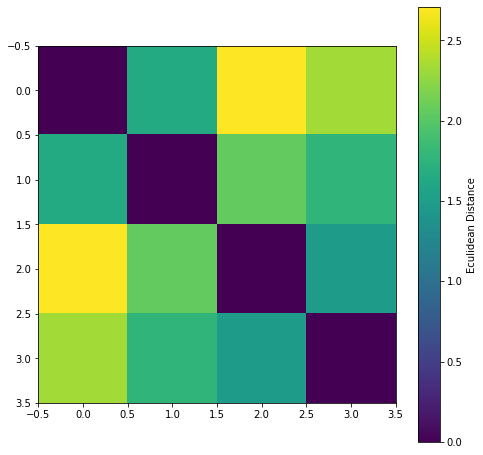

In [0]:
plt.figure(figsize=(8,8))
plt.imshow(pdist_euclid_squareform)
cbar = plt.colorbar()
cbar.set_label('Eculidean Distance')

In [0]:
# Performs hierarchical/agglomerative clustering
clusters_hac = hac.linkage(pdist_euclid, method='complete')

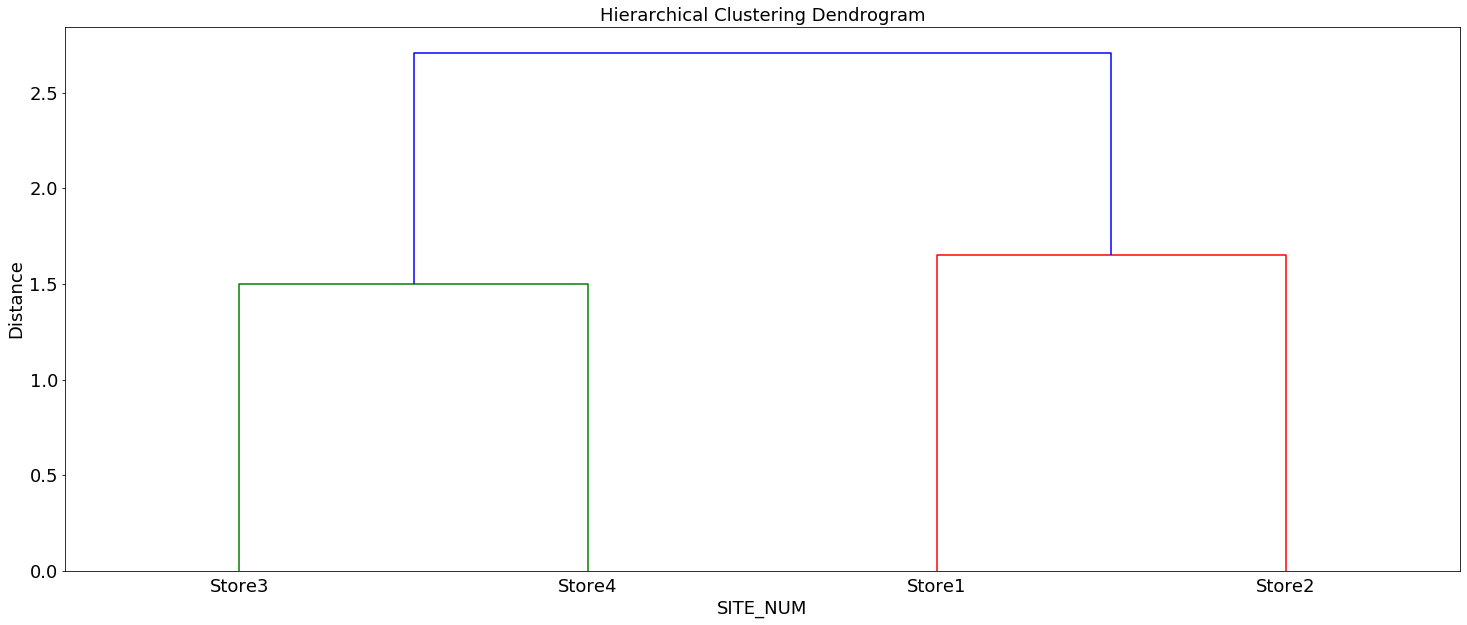

In [0]:
font_size = 18
plt.figure(figsize=(25, 10))

dendogram = hac.dendrogram(clusters_hac, labels=preclass_pivot_euclid.index)

plt.title('Hierarchical Clustering Dendrogram', fontsize=font_size)
plt.xlabel('SITE_NUM', fontsize=font_size)
plt.ylabel('Distance', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size);